# Step 1: Installation and Setup

cifar 10 데이터 셋 `

In [ ]:
# Installing TensorFlow
# ! pip install -q tensorflow-gpu

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [ ]:
# Importing the dataset
from tensorflow.keras.datasets import cifar10

In [ ]:
# Loading the dataset
#load_data() 메소드를 호출하면 4개를 넘겨준다(2개씩)x2
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 10s 0us/step


In [2]:
class_names = ['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']

In [ ]:
# Normalizing the images

In [ ]:
X_train[0]
## 첫번재 이미지가 됨
(50000, 32*32, 3(rgb) 중에 )


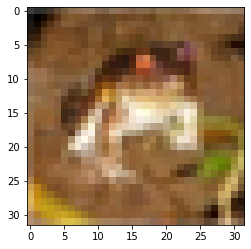

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train[0]
# 6은 ---개구리

array([6], dtype=uint8)

In [ ]:
X_train = X_train.astype(float) / 255

In [ ]:
X_test = X_test.astype(float) / 255

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train = X_train.reshape(-1, 32 * 32)
X_test = X_test.reshape(-1, 32 * 32)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

# Step 3: Building the CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [ ]:
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

In [ ]:
# Adding first CCN layer
# 1) filters (kernel) = 32
# 2) kernal size = 3
# 3) padding = same  ()  
# 5행5열을 컨볼루션을 하면 커널크기에 따라 3행3열로 줄어드는데
# 5행5열 크기를 유지시키고 싶을 때는 (크기는 줄어들지만 )
# padding=same으로 주고, 줄어든공간에 0을 넣어주고 
# 원래 크기는 유지함 (padding 값으로 0이 들어가게 됨)
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)
model.add ( Conv2D( filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)) )


In [ ]:
# Adding second CNN layer and maxpool layer
# 1) filters (kernel) = 32
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
model.add ( Conv2D( filters=32, kernel_size=(3, 3), padding='same', activation='relu') )
model.add ( MaxPooling2D( 2, 2) ) 

In [ ]:
# maxpool layer parameters,
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid
# maxpool 의 strides는 원본이미지를 커널로 훑을 때(컨볼루션 할때) 기본 1칸씩 이동하는데
# 몇칸씩 띄어서 이동할지를 지정하는것이 strides
# 사실 pool_size가 2x2 이므로 2칸씩 이동하므로 strides=2 맞다 (그래서 여기에서는 생략도 가능)
model.add ( MaxPooling2D( pool_size=(2 , 2), strides=2, padding='valid' ) )

In [ ]:
# Adding third CNN layer
# 1) filters (kernel) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
model.add ( Conv2D( filters=64, kernel_size=(3, 3), padding='same', activation='relu') )


In [ ]:
# Adding fourth CNN layer and maxpool layer
# 1) filters (kernel) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
model.add ( Conv2D( filters=64, kernel_size=(3, 3), padding='same', activation='relu') )


In [ ]:
# maxpool layer parameters,
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add ( MaxPooling2D( pool_size=(2 , 2), strides=2, padding='valid' ) ) 

In [ ]:
# Adding the dropout layer ( 0.4로 )
# 오버피팅을 막기위해서 Dropout()을 사용한다
model.add ( Dropout(0.4 ) )

In [ ]:
# Adding the Flattening layer
model.add( Flatten() )

ANN 연결

In [ ]:
# Adding first dense layer
model.add( Dense(units= 1024, activation='relu' ) )

In [ ]:
# Adding second dense layer (output layer)
model.add (Dense( units=10, activation='softmax') )

In [ ]:
# 모델 서머리 해본다.
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)         

# Step 4: Training the model

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
# Compiling the model
# loss 는 sparse_categorical_accuracy 로 셋팅한다.
# metircs 는 accuracy
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 학습한다.
# validation_data=(X_test, y_test)  --> X_train, y_train으로 학습하는 중에 
# X_test, y_test 값으로 검증을 해본다. 이때 y_test 값을 알려줘서 학습하는 것은 아니다. 검증만함
history = model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split=0.25 )

Epoch 1/10
1172/1172 [==============================] - 13s 5ms/step - loss: 1.8064 - accuracy: 0.3348 - val_loss: 1.2283 - val_accuracy: 0.5660
Epoch 2/10
1172/1172 [==============================] - 5s 4ms/step - loss: 1.1997 - accuracy: 0.5712 - val_loss: 0.9678 - val_accuracy: 0.6617
Epoch 3/10
1172/1172 [==============================] - 5s 4ms/step - loss: 1.0106 - accuracy: 0.6469 - val_loss: 0.9348 - val_accuracy: 0.6738
Epoch 4/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.9220 - accuracy: 0.6783 - val_loss: 0.8751 - val_accuracy: 0.6991
Epoch 5/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.8696 - accuracy: 0.6999 - val_loss: 0.8842 - val_accuracy: 0.6975
Epoch 6/10
1172/1172 [==============================] - 5s 4ms/step - loss: 0.8424 - accuracy: 0.7125 - val_loss: 0.8058 - val_accuracy: 0.7329
Epoch 7/10
1172/1172 [==============================] - 5s 5ms/step - loss: 0.8157 - accuracy: 0.7224 - val_loss: 0.8143 - val_accuracy

# Step 5: Model evaluation and prediction

In [ ]:
# model 을 evaluate 한다.
result = model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.8644 - accuracy: 0.7186


In [ ]:
result

[1.023362398147583, 0.7283999919891357]

In [ ]:
# 테스트 셋으로 Predictions
y_pred = model.predict( X_test)

In [ ]:
y_pred

array([[1.39791489e-04, 1.83288124e-04, 2.11121445e-03, ...,
        2.26990250e-03, 7.42500633e-05, 3.16873666e-05],
       [1.47208327e-03, 6.85471157e-03, 1.07414650e-07, ...,
        1.30165965e-11, 9.90426004e-01, 1.24708144e-03],
       [1.38626158e-01, 3.57435644e-02, 1.04168959e-01, ...,
        3.56337689e-02, 4.22457218e-01, 4.06054445e-02],
       ...,
       [7.52392543e-06, 3.37658079e-09, 5.80257960e-02, ...,
        1.45502225e-03, 3.54898873e-07, 4.53259190e-08],
       [6.50641099e-02, 7.46501386e-01, 2.55049728e-02, ...,
        2.81495452e-02, 3.03258980e-03, 5.72865922e-03],
       [1.95880616e-12, 7.74107937e-13, 9.34039335e-09, ...,
        9.96742666e-01, 1.29612029e-15, 1.56424719e-13]], dtype=float32)

In [ ]:
# 모델링에서 output layer를 10개로 했기 때문에 
# 10개중에서 가장 큰 값이 가장 확률이 높음 (softmax는 전체를 다 더하면 1이 됨)

In [ ]:
y_pred[0].sum()

1.0000001

In [ ]:
X_test[0]

In [ ]:
# Confusion matrix 해본다.
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_pred = y_pred.argmax(axis=1)

In [ ]:
y_pred

array([5, 8, 8, ..., 5, 1, 7])

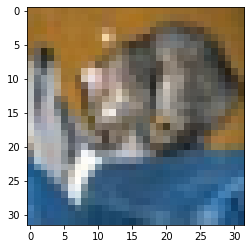

In [ ]:
plt.imshow(X_test[0])
# 테스트한 0번재는???

In [ ]:
# x_test[0]의 정답 == 고양이
y_test[0]

array([3], dtype=uint8)

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
# y_pred 10개중에 가장 높은 값을 뽑아 와야 함
y_pred.argmax(axis = 1)

# y_test 와 비교했을 때 모양은 달라보임

array([5, 8, 8, ..., 5, 1, 7])

In [ ]:
# 이때 reshape를 해주면 같아진다.
y_pred.argmax(axis = 1).reshape(-1, 1)

array([[5],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

In [ ]:
y_pred = y_pred.argmax(axis=1).reshape(-1, 1)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[745,  14, 101,  33,  16,  16,   7,  19,  40,   9],
       [ 15, 840,   9,  22,   5,  18,  19,   9,  27,  36],
       [ 54,   2, 599,  61,  91,  98,  72,  16,   5,   2],
       [ 12,   5,  61, 491,  58, 248,  95,  22,   4,   4],
       [ 16,   0,  57,  57, 725,  54,  63,  24,   4,   0],
       [  6,   0,  42, 109,  43, 739,  35,  22,   3,   1],
       [  5,   1,  39,  53,  39,  33, 826,   3,   1,   0],
       [  8,   1,  47,  53,  45,  92,  13, 740,   1,   0],
       [ 77,  10,  23,  28,   4,  10,  14,   2, 824,   8],
       [ 57, 123,  19,  44,   5,  38,   7,  22,  28, 657]])

In [ ]:
# 정확도를 계산해 본다.
accuracy_score(y_test, y_pred)

0.7186

In [ ]:
history.history['accuracy'][-1]

0.9111733436584473

In [ ]:
history.history['loss'][-1]

0.2516447603702545

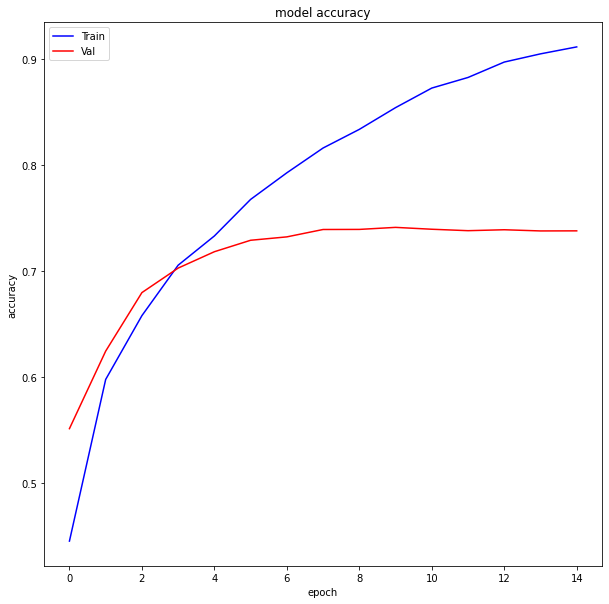

In [ ]:
#overfitting 확인하기
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'], color = 'b')
plt.plot(history.history['val_accuracy'], color ='r')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val']) #Val은 training셋에서 자체 25%테스트 한 것
plt.show()


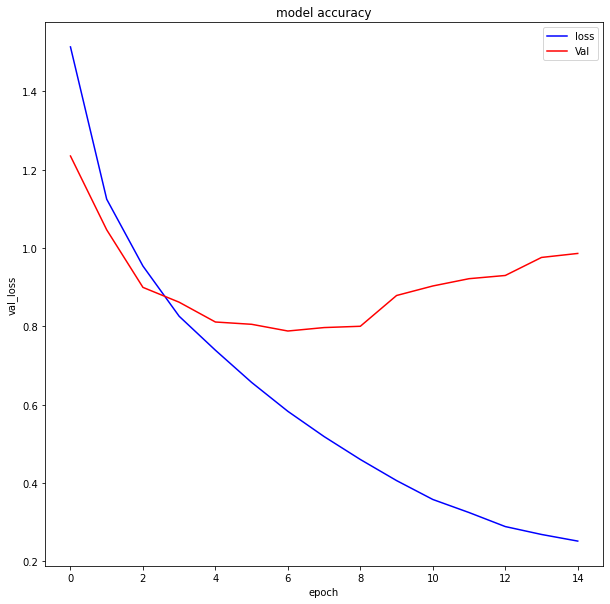

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], color = 'b')
plt.plot(history.history['val_loss'], color ='r')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.legend(['loss', 'Val']) #Val은 training셋에서 자체 25%테스트 한 것
plt.show()


In [4]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  
  path = '/content/' + fn
  # 디렉토리안에 있는 하위디렉토리의 알파벳 순으로 순서가 됨 먼저가 (예: happy가 0, sad는 1)
  # 픽사베이등에서 받은 파일들을 처리할 때
  # 이미지를 load_img() 통해 target_size는 원래의 크기와 맞춰서 바꿔줘야한다
  img = image.load_img(path, target_size=(32, 32) )
  # image를 ndarray로 
  x = image.img_to_array(img)

  # 원래 3차원 이지
  # print(x.shape)

  # 행으로 한 차원을 늘림 (150, 150, 1) 이 되게 됨
  x = np.expand_dims(x, axis = 0)

  #print(x.shape)

  images = np.vstack([x])
  classes = model.predict( images, batch_size = 10)

  # 10개로 분류문제라 10개의 숫자로 결과가 나온다
  print(classes[0])

  result = classes[0].argmax()
  if result == 0:
    print('에어플레인')
  elif result == 1:
      print('automobile')
  elif result == 2:
      print('bird')
  elif result == 3:
      print('cat')
  elif result == 4:
      print('deer')
  elif result == 5:
      print('dog')
  elif result == 6:
      print('frog')
  elif result == 7:
      print('horse')
  elif result == 8:
      print('ship')
  elif result == 9:
      print('truck')

  
  

Saving airplane-983991_640.jpg to airplane-983991_640.jpg


NameError: ignored

In [ ]:
result = classes[0].argmax()




  

에어플레인


In [3]:
class_names

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']